# Data Ukuran Sangat Besar: Best Books (10k) Multi-Genre Data dari Kaggle dengan link sebagai berikut:
https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data/data

In [13]:
%pip install pandas scikit-learn numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


- ## Load Dataset
Pada bagian ini kita akan memuat dataset yang sudah kita download sebelumnya.

In [14]:
import pandas as pd

df = pd.read_csv('../Data/goodreads_data.csv')
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


- ## Informasi Struktur DataFrame
Bagian ini menampilkan ringkasan struktur DataFrame, termasuk jumlah baris, nama kolom, jumlah data non-null, tipe data setiap kolom, dan penggunaan memori.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [22]:
df['Num_Ratings'] = df['Num_Ratings'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  float64
 7   URL          10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


- ## Cek Missing Value
Pada bagian ini kita akan mengecek apakah ada data yang hilang pada dataset kita.

In [23]:
print(f"Nilai yang hilang:\n{df.isnull().sum()}")

Nilai yang hilang:
Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


In [24]:
df['Description'] = df['Description'].fillna('unknown')
print(f"Nilai yang hilang setelah diisi:\n{df.isnull().sum()}")

Nilai yang hilang setelah diisi:
Unnamed: 0     0
Book           0
Author         0
Description    0
Genres         0
Avg_Rating     0
Num_Ratings    0
URL            0
dtype: int64


- ## Cek Data Terduplikat
Pada bagian ini kita akan mengecek apakah ada data yang terduplikat pada dataset kita.

In [25]:
print(f"Data yang terduplikat: {df.duplicated().sum()}")

Data yang terduplikat: 0


- ## Visualisasi Outlier pada Kolom Numerik dengan Boxplot
Pada bagian ini, kita akan memvisualisasikan outlier pada setiap fitur numerik menggunakan boxplot untuk membantu identifikasi data ektrem pada masing-masing fitur.

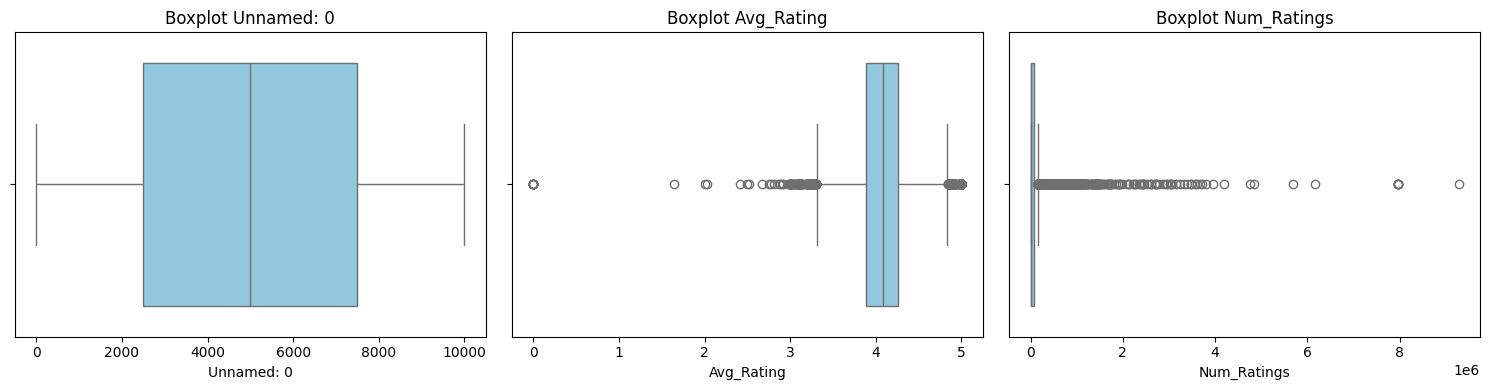

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Unnamed: 0', 'Avg_Rating', 'Num_Ratings']

outlier_indices = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

- ## Menangani dan Memvisualisasikan Outlier pada Data Numerik
Pada bagian ini, kita akan menangani outlier pada setiap fitur numerik dengan metode IQR (Interquartile Range) dan kemudian memvisualisasikan hasilnya menggunakan boxplot untuk memastikan outlier telah ditangani dengan baik.

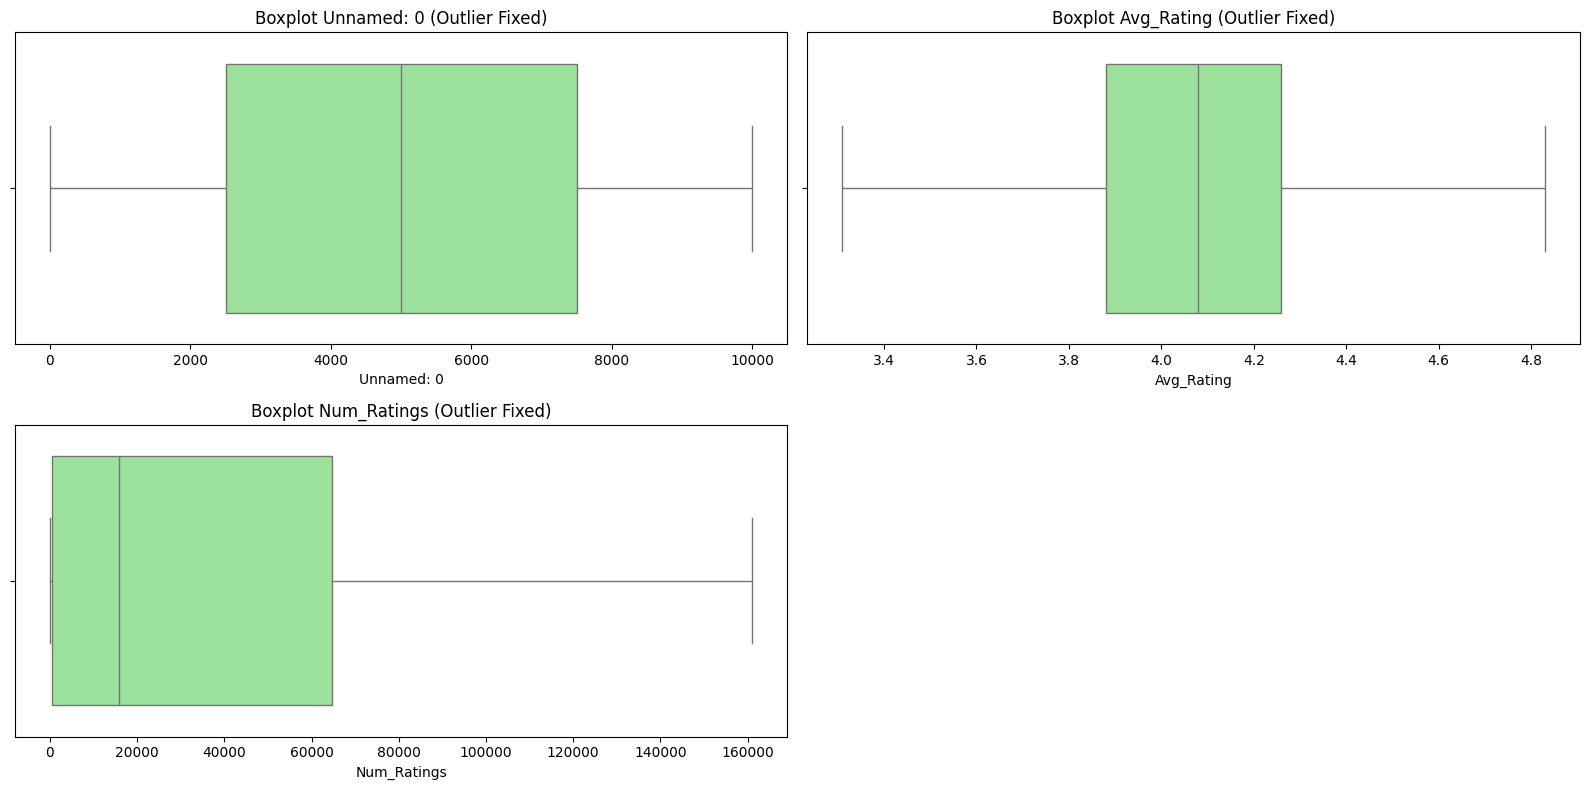

In [27]:
df_outlier_fixed = df.copy()
for col in numerical_cols:
    Q1 = df_outlier_fixed[col].quantile(0.25)
    Q3 = df_outlier_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier_fixed[col] = df_outlier_fixed[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df_outlier_fixed[col], color='lightgreen')
    plt.title(f'Boxplot {col} (Outlier Fixed)')
plt.tight_layout()
plt.show()

- ## Label Encoding pada Kolom Kategori
Pada bagian ini, kita akan melakukan label encoding pada beberapa kolom kategori untuk mempersiapkan data sebelum proses modeling.

In [28]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Book', 'Author', 'Description', 'Genres', 'URL']

df_encoded = df.copy()

le_dict = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

df_encoded[cols_to_encode].head()

,Book,Author,Description,Genres,URL
0,9027,2113,8082,623,4665
1,2871,2350,3620,1439,8787
2,5008,2494,6847,733,3155
3,6772,409,2631,844,7160
4,653,1960,5269,542,2298


- ## Normalisasi Data Numerik  
Normalisasi pada kolom numerik menggunakan `StandardScaler` bertujuan agar setiap fitur numerik memiliki skala yang seragam sehingga analisis dan pemodelan menjadi lebih optimal.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,-1.731878,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",0.600650,16.362867,https://www.goodreads.com/book/show/2657.To_Ki...
1,-1.731531,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",1.197056,26.846618,https://www.goodreads.com/book/show/72193.Harr...
2,-1.731185,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",0.630470,11.256191,https://www.goodreads.com/book/show/1885.Pride...
3,-1.730838,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",0.332267,9.924198,https://www.goodreads.com/book/show/48855.The_...
4,-1.730492,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",-0.264139,10.177708,https://www.goodreads.com/book/show/170448.Ani...


- ## Visualisasi Distribusi Data Numerik
Pada bagian ini, kita akan memvisualisasikan distribusi dari setiap fitur numerik menggunakan histogram untuk melihat pola sebaran data setelah proses normalisasi dan penanganan outlier.

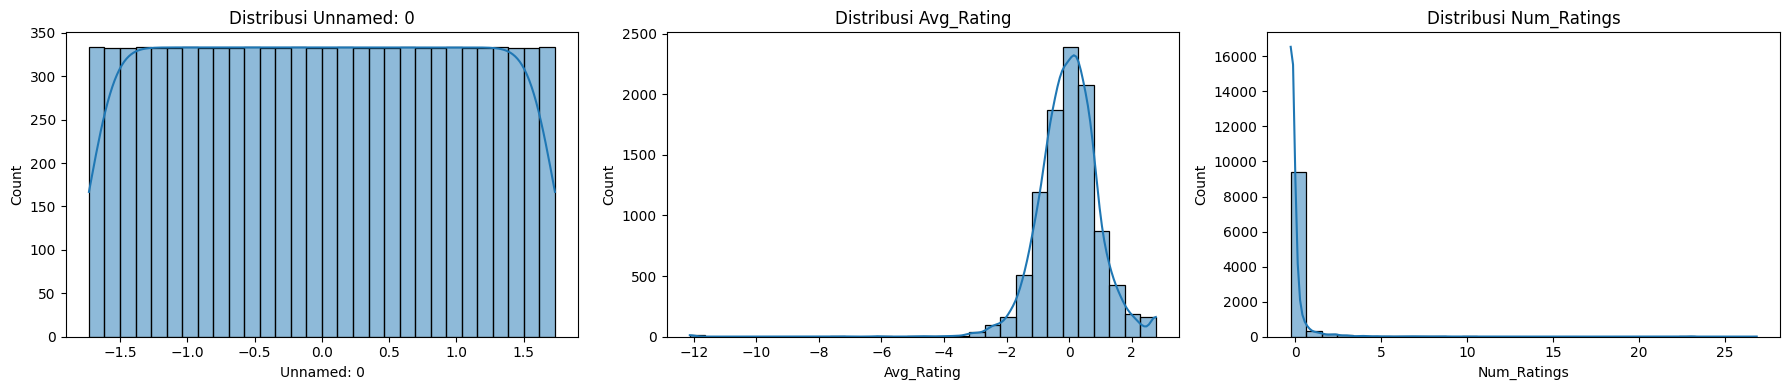

In [30]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

- ## Visualisasi Jumlah Judul Buku Unik per Author  
Pada bagian ini, kita akan memvisualisasikan jumlah judul buku unik (`Book`) untuk setiap penulis (`Author`) guna mengetahui distribusi produktivitas penulis dalam dataset.

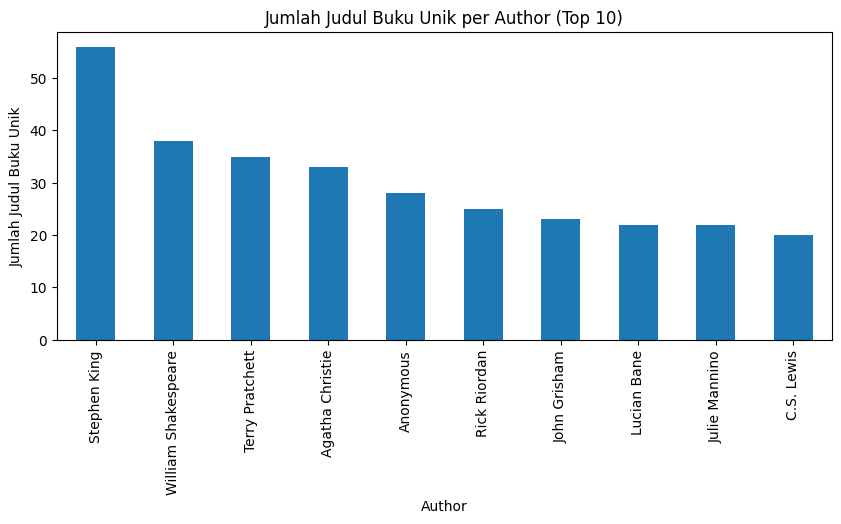

In [31]:
if 'Author' in df.columns and 'Book' in df.columns:
    unique_books = df.groupby('Author')['Book'].nunique().sort_values(ascending=False)
    unique_books.head(10).plot(kind='bar', figsize=(10, 4), title='Jumlah Judul Buku Unik per Author (Top 10)')
    plt.ylabel('Jumlah Judul Buku Unik')
    plt.xlabel('Author')
    plt.show()

- ## Korelasi antar Variabel Numerik
Visualisasi analisis hubungan antar fitur numerik menggunakan heatmap korelasi untuk mengidentifikasi pola dan keterkaitan antar variabel.

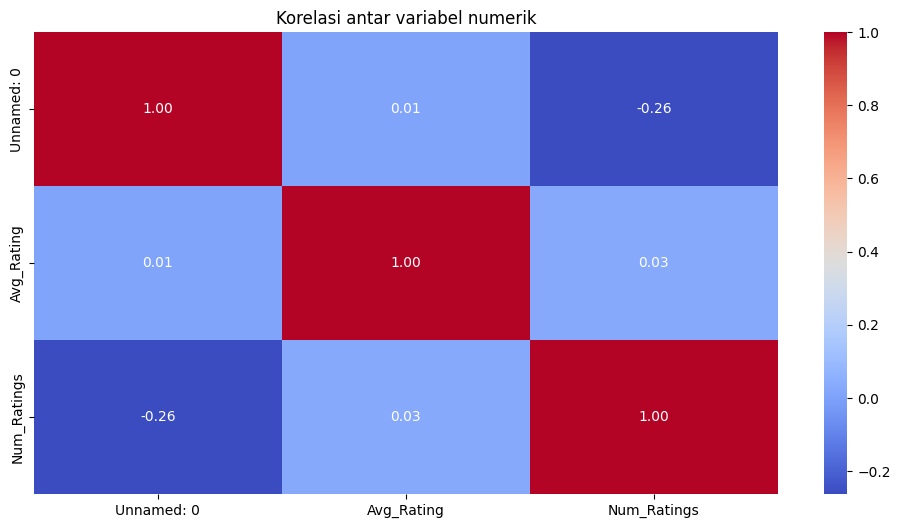

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antar variabel numerik')
plt.show()

- ## Pembentukan Cluster dengan KMeans
Pada bagian ini, kita akan melakukan clustering pada data menggunakan algoritma KMeans. Data numerik akan digunakan sebagai fitur, dan hasil cluster akan ditambahkan ke dataframe sebagai kolom baru `Cluster`.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster = df_encoded[numerical_cols]

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

df_encoded['Cluster'] = cluster_labels

print(df_encoded['Cluster'].value_counts())

sil_score = silhouette_score(X_cluster, df_encoded['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Cluster
0    9932
1      68
Name: count, dtype: int64
Silhouette Score: 0.9577


- ## Menentukan Jumlah Cluster Optimal dengan Metode Elbow  
Bagian ini menggunakan metode Elbow untuk menentukan jumlah cluster optimal pada data dengan memvisualisasikan nilai inertia untuk berbagai jumlah cluster.

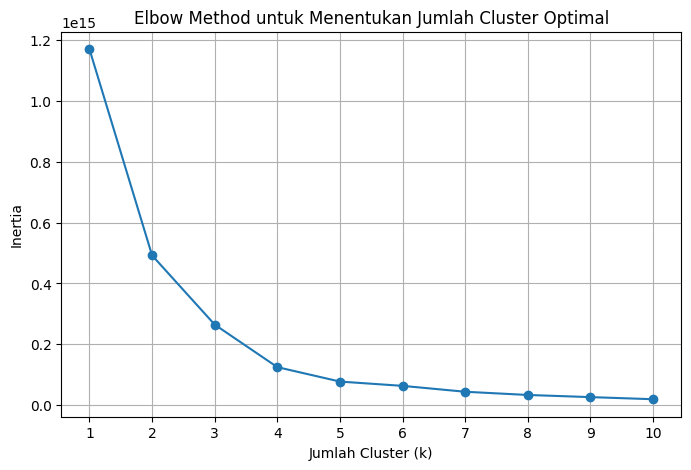

In [34]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42)
    kmeans_tmp.fit(X_cluster)
    inertia.append(kmeans_tmp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.show()

- ## Evaluasi Model KMeans Clustering
Bagian ini menampilkan evaluasi hasil clustering, termasuk jumlah cluster, distribusi anggota tiap cluster, nilai silhouette score, rata-rata Avg_Rating pada tiap cluster, serta visualisasi rata-rata Avg_Rating per cluster

Evaluasi Model KMeans Clustering
Jumlah cluster: 2
Distribusi anggota tiap cluster:
Cluster
0    9932
1      68
Name: count, dtype: int64
Silhouette Score: 0.9577

Rata-rata Avg_Rating pada tiap cluster:
Cluster
0    4.067970
1    4.157206
Name: Avg_Rating, dtype: float64


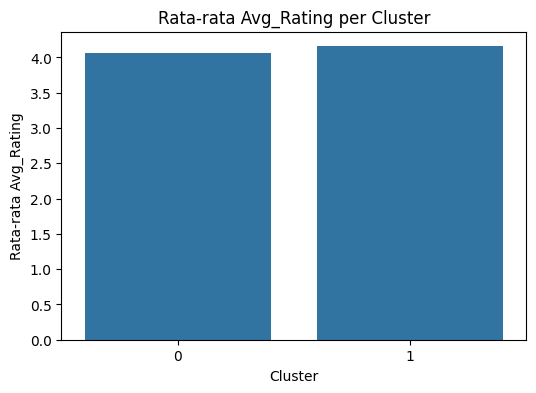

In [36]:
print("Evaluasi Model KMeans Clustering")
print(f"Jumlah cluster: {n_clusters}")
print(f"Distribusi anggota tiap cluster:\n{df_encoded['Cluster'].value_counts()}")
print(f"Silhouette Score: {sil_score:.4f}")

cluster_avg_rating = df_encoded.groupby('Cluster')['Avg_Rating'].mean()
print("\nRata-rata Avg_Rating pada tiap cluster:")
print(cluster_avg_rating)

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_avg_rating.index, y=cluster_avg_rating.values)
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Avg_Rating')
plt.title('Rata-rata Avg_Rating per Cluster')
plt.show()